In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Family
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import skimage as sk

In [ ]:
import pandas_profiling
%matplotlib inline

In [ ]:
def load_image(Location ,dim=(128,128)):  
    """ * 150 is Height of image and 
        * 150 width of a image
    """
    image_dir = Path(Location)
    folders = [directory for directory  in image_dir.iterdir() if directory.is_dir()]
    categories  = [fo.name for fo in folders]
    
    
    images = []
    flat_data =[]
    target = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = sk.io.imread(file)
            #print("Before Transformation ")
            #plt.imshow(img)
            #plt.show()
            
            img_resized = resize(img, dim, anti_aliasing=True, mode='reflect')
            #print("After Transformation")
            plt.imshow(img_resized)
            #plt.show()
            
            # List Method append I am using Hear
            
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
            
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images)

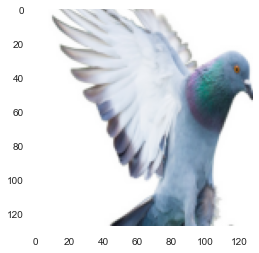

In [7]:
Data = load_image("Datasets/Birds")

In [8]:
Data.keys()

dict_keys(['data', 'target', 'target_names', 'images'])

In [9]:
Features = Data.data
Features.shape

(78, 49152)

In [10]:
target = Data.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
df = pd.DataFrame(Features)
df['Class']= target

In [12]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,Class
0,0.350524,0.284792,0.258652,0.350245,0.288434,0.260983,0.344485,0.290518,0.262745,0.341176,...,0.813526,0.825291,0.825291,0.835852,0.850604,0.85288,0.864979,0.87973,0.884586,0
1,0.890196,0.698039,0.531182,0.886275,0.695312,0.522763,0.879626,0.690196,0.517647,0.878431,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,0


In [13]:
df.to_csv("Birds_Classification.csv")

In [14]:
Data.target_names

['Parrot', 'Pigeon']

|Birds Names|Values|
|------|-----|
|Parrot|0|
|Pigeon|1|


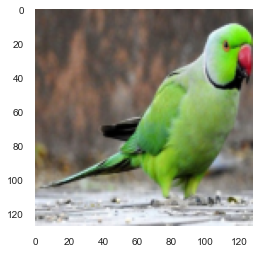

In [15]:
plt.imshow(Data.images[0])

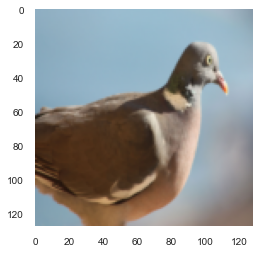

In [19]:
plt.imshow(Data.images[-24])

In [20]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(Features,target,test_size=0.35)

In [90]:
from sklearn.neighbors import KNeighborsClassifier 

# Metrics intended for real-valued vector spaces:
|**Identifier**|**Class name in scikit-learn**|**Args**|**Distance function**|
|--------------|------------|------------|------------|
|`Euclidean`|EuclideanDistance|.|$sqrt(sum((x - y)^2))$|
|`Manhattan`|ManhattanDistance|.|$sum(x - y)$|
|`chebyshev`|ChebyshevDistance|.|$max(x - y)$|
|`minkowski`|MinkowskiDistance|p|$sum(x - y^p)^(1/p)$|
|`wminkowski`|WMinkowskiDistance|p, w|$sum(w * (x - y)^p)^(1/p)$|
|`seuclidean`|SEuclideanDistance|V|$sqrt(sum((x - y)^2 / V))$|
|`mahalanobis`|MahalanobisDistance|V or VI|$sqrt((x - y)' V^-1 (x - y))$|

In [91]:
knn  = KNeighborsClassifier(n_neighbors=3)

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
knn.metric

'minkowski'

In [94]:
yhat = knn.predict(x_test)
yhat

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1])

In [95]:
knn.predict_proba(x_test) # Return probability estimates for the test data

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ]])

In [96]:
Train_Score = knn.score(x_train,y_train)
Train_Score

0.82

In [97]:
Test_score = knn.score(x_test,yhat)
Test_score

1.0

In [47]:
Comp = pd.DataFrame({"Actual_data":y_test,
             "New Predication":yhat})
Comp

,Actual_data,New Predication
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,0
8,0,1
9,0,1
